In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('data.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))


In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));


interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X=data.iloc[:,2:4].values

In [ ]:
X.shape

(400, 2)

In [ ]:
y=data.iloc[:,-1].values

In [ ]:
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [ ]:
X_train.shape

(320, 2)

In [ ]:
X_test.shape

(80, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.14237380e+00, -1.10560796e+00],
       [-2.94863100e-01,  2.39504800e-01],
       [ 7.40983318e-01,  5.68310142e-01],
       [-1.23654166e+00,  2.99287590e-01],
       [-1.06527387e-01,  9.00478266e-02],
       [-2.94863100e-01, -1.46430470e+00],
       [ 1.87099759e+00, -1.37463051e+00],
       [-1.33070952e+00, -1.25506494e+00],
       [ 2.70144037e-01,  9.00478266e-02],
       [-1.04820595e+00, -1.55397888e+00],
       [ 1.87099759e+00, -6.57237042e-01],
       [ 1.02348689e+00, -8.96368199e-01],
       [ 8.18083250e-02,  2.99287590e-01],
       [ 1.30599045e+00,  6.28092932e-01],
       [ 2.70144037e-01, -1.16539075e+00],
       [-1.06527387e-01, -4.18105884e-01],
       [-1.23595311e-02, -1.19191936e-01],
       [ 1.87099759e+00, -9.26259594e-01],
       [-1.14237380e+00, -1.16539075e+00],
       [ 1.75976181e-01, -1.19191936e-01],
       [ 1.75976181e-01, -2.68648910e-01],
       [ 8.35151174e-01, -1.37463051e+00],
       [-1.33070952e+00, -4.18105884e-01],
       [ 9.

In [ ]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.55264761,  2.09277127],
       [-0.2948631 , -0.56756286],
       [ 0.74098332, -0.2985403 ],
       [ 1.87099759,  2.24222825],
       [ 0.92931903, -1.16539075],
       [-1.04820595,  0.62809293],
       [ 1.02348689, -0.11919194],
       [-1.1423738 , -1.58387028],
       [-1.61321309,  0.09004783],
       [ 0.83515117, -1.16539075],
       [-0.2948631 , -0.3284317 ],
       [ 0.74098332, -1.37463051],
       [ 0.74098332, -1.22517354],
       [ 0.17597618, -0.35832309],
       [-0.76570238, -0.59745425],
       [-0.20069524,  1.67429175],
       [ 1.02348689,  0.56831014],
       [-0.20069524,  1.46505198],
       [-0.67153452, -0.3284317 ],
       [-0.67153452, -0.08930054],
       [-0.48319881, -1.13549936],
       [-0.85987024,  0.41885317],
       [-0.2948631 , -0.8963682 ],
       [ 1.02348689,  2.15255406],
       [-1.89571665,  0.38896177],
       [-0.38903096, -1.31484773],
       [-0.95403809,  0.29928759],
       [ 0.17597618,  2.18244546],
       [-1.04820595,

In [ ]:
# 1st method
np.sqrt(X_train.shape[0])

17.88854381999832

In [ ]:
k=17

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [ ]:
# Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
y_pred.shape

(80,)

In [ ]:
y_test.shape

(80,)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[50,  5],
       [ 4, 21]])

In [ ]:
# Effect of K on Training Error rate and Validation Error rate

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train))
    y=confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())


In [ ]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))

    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)

    if knn.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [ ]:
predict_output()

### Few Observations

In [ ]:
# 1. Hyperparameters

# 2. Method to choose K

# ---->Method 1 K=17
# ---->Method 2 K=11

## 1. Decision Boundary for Knn

### 1. What is Decision Boundary

<p>In a classification problem with two or more classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two or more sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.</p>

<img src='https://aws1.discourse-cdn.com/business5/uploads/julialang/original/2X/f/f11eb7f942661dd020c059a3a9718305fd550c41.png'>

### Important Points
<ol>
    <li>We can draw decision boundary for all the classification algorithms including Neural networks</li>
    <li>Decision boundary can be both linear(as in the case of SVM) or non-linear(as in the case of Decision tree classifier or Knn) </li>
    <li>Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.</li>
    <li>For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)</li>
</ol>

## 2. Vornoi Diagram

<p>In mathematics, a Voronoi diagram is a partitioning of a plane into regions based on distance to points in a specific subset of the plane.</p>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/220px-Euclidean_Voronoi_diagram.svg.png'>

## 3. Steps to plot Decision Boundary for Knn(Assuming 2 input cols)
<ol>
    <li>Train the classifier on the training set.</li>
    <li>Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.</li>
    <li>Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i, column j on the grid.</li>
    <li>Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.</li>
    <li>Finally print out the training data with their respective color on the same contour</li>
</ol>

### Step 2: Creating a Meshgrid

In [ ]:
a.shape

(596,)

In [ ]:
b.shape

(604,)

In [ ]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

In [ ]:
YY.shape

(604, 596)

### Step 3: Classifiying every point on the meshgrid

In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

### Step 4: Plotting the array as an image

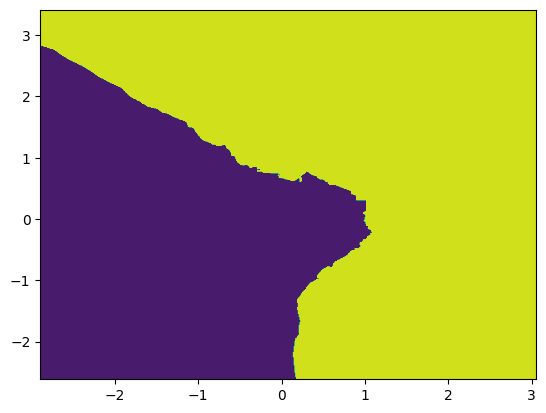

In [ ]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

### Step 5: Plotting all the training data on the plot

In [ ]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)

NameError: ignored

## Effect of K on Decision Boundary

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def keffect(data,k):
    data=pd.read_csv('toy_datasets/{}'.format(data))
    X=data.iloc[:,:2].values
    y=data.iloc[:,-1].values

    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=knn.predict(input_array)

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)

### Dataset 1: Ushape

In [ ]:
keffect('ushape.csv',1)

In [ ]:
keffect('ushape.csv',5)

In [ ]:
keffect('ushape.csv',30)

### Dataset 2: Linear Seperation

In [ ]:
keffect('linearsep.csv',1)

In [ ]:
keffect('linearsep.csv',5)

In [ ]:
keffect('linearsep.csv',30)

### Dataset 3: Concentric Circles

In [ ]:
keffect('concertriccir2.csv',1)

In [ ]:
keffect('concertriccir2.csv',5)

In [ ]:
keffect('concertriccir2.csv',50)

### Dataset 4: XOR

In [ ]:
keffect('xor.csv',1)

In [ ]:
keffect('xor.csv',30)

### Dataset 5: Two Spirals

In [ ]:
keffect('twoSpirals.csv',1)

## Conclusion

1. For smaller values of K(=1) the model generally overfits and shows High Variance.
2. For higher values of K(=n, where n is the no. of rows in training set), the model underfits and shows High Bias
3. As we increase the value of K the smoothness of Decision Boundary/Surface increases